# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica!

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [ ]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("/content/penguins.csv")


In [ ]:
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
penguins_df.isna().sum().sort_values()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [ ]:
num_columns = df.columns.tolist()
num_columns.remove('sex')

In [ ]:
num_columns

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [ ]:
penguins_df.boxplot()
plt.show()

penguins_clean = penguins_df.dropna()
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
encoded_col = ohe.fit_transform(penguins_clean['sex'].values.reshape(-1,1)).todense().astype(int)
ohe_columns = ohe.get_feature_names_out(['sex'])

penguins_ohe = penguins_clean.reset_index().drop(['index','sex'], axis=1).join(pd.DataFrame(encoded_col,columns=ohe_columns))

In [ ]:
penguins_ohe

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,1,0
329,46.8,14.3,215.0,4850.0,1,0
330,50.4,15.7,222.0,5750.0,0,1
331,45.2,14.8,212.0,5200.0,1,0


In [ ]:
scalable_data = penguins_ohe[num_columns]
df2 = penguins_ohe[ohe_columns.tolist()]

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scalable_data)
df1 = pd.DataFrame(scaled_data, columns=num_columns)
df1.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,5.547781e-16,-1.280257e-15,-3.840772e-16,4.267524e-16
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-2.196846e+00,-2.063612e+00,-1.447398e+01,-1.883014e+00
25%,-8.246802e-01,-7.932157e-01,-4.332962e-01,-8.184767e-01
50%,1.024586e-01,7.065388e-02,-1.280640e-01,-1.922786e-01
75%,8.441696e-01,7.820758e-01,5.696097e-01,7.157087e-01
max,2.605733e+00,2.204920e+00,1.354492e+00,2.625613e+00


In [ ]:
penguins_preprocessed = pd.concat([df1, df2], axis=1)
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.898851,0.782076,-0.825738,-0.567997,0,1
1,-0.824680,0.121470,-0.607715,-0.505378,1,0
2,-0.676338,0.426365,-0.215273,-1.194196,1,0
3,-1.343878,1.086971,-0.302482,-0.943716,1,0
4,-0.861766,1.747577,-0.433296,-0.693237,0,1
...,...,...,...,...,...,...
328,0.603114,-1.758717,0.613214,0.903568,1,0
329,0.528942,-1.453822,0.656819,0.809638,1,0
330,1.196482,-0.742400,0.962051,1.936795,0,1
331,0.232258,-1.199742,0.526005,1.247977,1,0


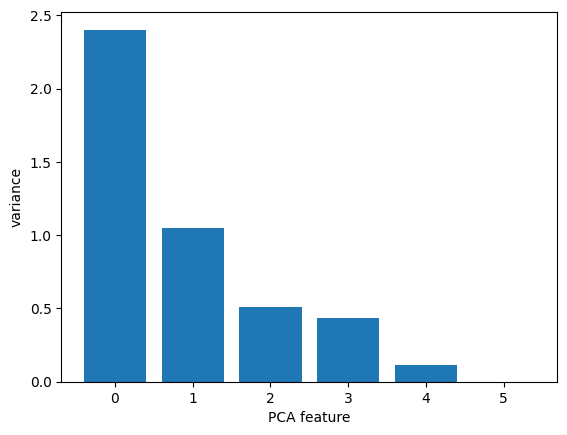

In [ ]:
pca = PCA()
pca_features = pca.fit_transform(penguins_preprocessed)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [ ]:
n_components = 2

In [ ]:
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(penguins_preprocessed)
penguins_pca = pd.DataFrame(pca_components)
penguins_pca

,0,1
0,1.424890,0.601822
1,1.130533,-0.655215
2,1.368975,-0.530635
3,1.874405,-0.276364
4,1.674811,1.233412
...,...,...
328,-1.760679,-1.330983
329,-1.568000,-1.164730
330,-2.551681,0.542867
331,-1.495942,-1.019678


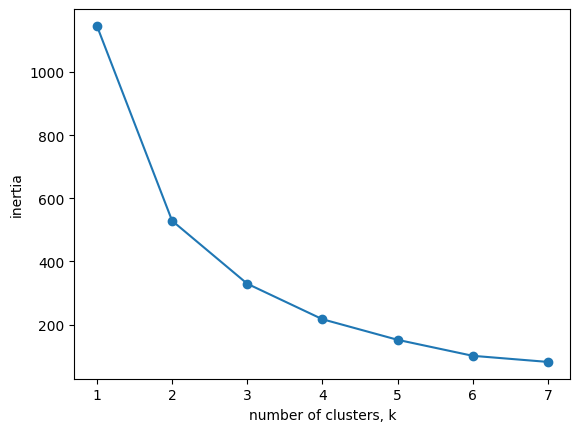

In [ ]:
ks = range(1,8)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(penguins_pca)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

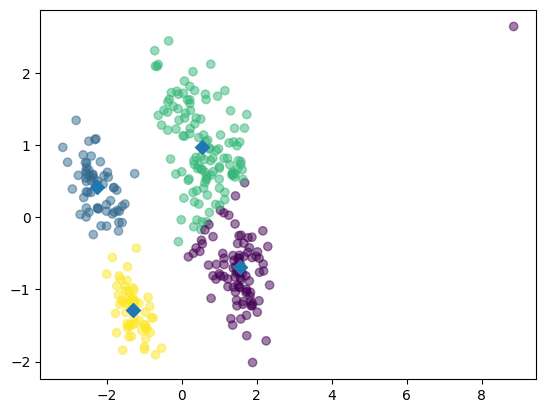

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(penguins_pca)
labels = kmeans.labels_

xs = penguins_pca[0]
ys = penguins_pca[1]

plt.scatter(xs, ys, c=labels, alpha=0.5)
centroids = kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

In [ ]:
penguins_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
penguins_clean['label'] = labels
penguins_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,2
1,39.5,17.4,186.0,3800.0,FEMALE,0
2,40.3,18.0,195.0,3250.0,FEMALE,0
4,36.7,19.3,193.0,3450.0,FEMALE,0
5,39.3,20.6,190.0,3650.0,MALE,2
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE,3
340,46.8,14.3,215.0,4850.0,FEMALE,3
341,50.4,15.7,222.0,5750.0,MALE,1
342,45.2,14.8,212.0,5200.0,FEMALE,3


In [ ]:
stat_penguins = penguins_clean.groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,38.647872,17.539362,184.542553,3387.765957
1,49.305000,15.696667,221.400000,5475.416667
2,44.634167,19.021667,194.950000,3970.833333
3,45.545763,14.262712,212.779661,4683.050847
